# Practice 1. Calculating centrality measures in weighted graphs

- Construct a directed weighted graph G from Edge.csv and Nodes.csv

- Calculating centrality measures (Degree, Betweenness, Closeness, Katz, Eighvector, Pagerank)


In [327]:
# Import libraries
import pandas as pd 
import networkx as nx 
import matplotlib.pyplot as plt 
%matplotlib inline

## Loading Datasets:


In [328]:
#Read nodes and edges datasets
nodes = pd.read_csv('./data/Nodes.csv')
edges = pd.read_csv('./data/Edges.csv')

## Check nodes

In [329]:
nodes.head(5)

,id
0,s01
1,s02
2,s03
3,s04
4,s05


## Check edges

In [330]:
edges.head()
edges.shape

(51, 3)

In [331]:
#Collapse all edges of the same type between the same two nodes by summing their weights
edges = edges.groupby(['from', 'to'])['weight'].sum().reset_index()
edges.head(5)

,from,to,weight
0,s01,s02,22
1,s01,s03,22
2,s01,s04,21
3,s01,s15,20
4,s02,s01,23


## Create directed graph using edgelist


In [332]:
G = nx.from_pandas_edgelist(edges, source='from', target='to',edge_attr=True, create_using=nx.Graph())

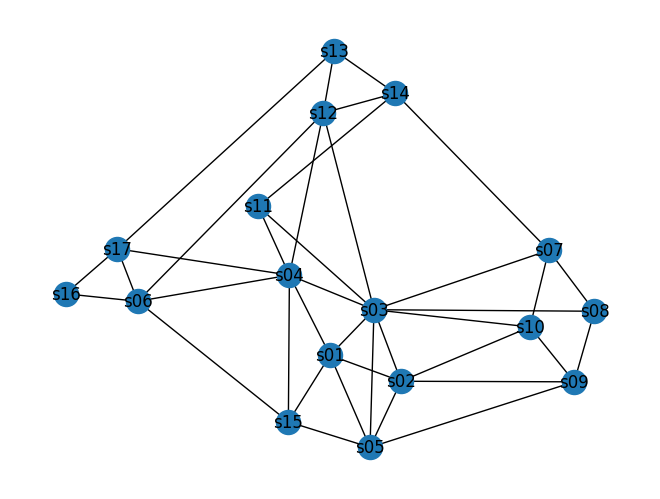

In [333]:
nx.draw(G,with_labels=True)
#nx.draw(G)

In [334]:
#Check edge data
G.edges.data()

EdgeDataView([('s01', 's02', {'weight': 23}), ('s01', 's03', {'weight': 21}), ('s01', 's04', {'weight': 21}), ('s01', 's15', {'weight': 22}), ('s01', 's05', {'weight': 1}), ('s02', 's03', {'weight': 21}), ('s02', 's09', {'weight': 1}), ('s02', 's10', {'weight': 5}), ('s02', 's05', {'weight': 21}), ('s03', 's04', {'weight': 23}), ('s03', 's05', {'weight': 1}), ('s03', 's08', {'weight': 2}), ('s03', 's10', {'weight': 2}), ('s03', 's11', {'weight': 1}), ('s03', 's12', {'weight': 1}), ('s03', 's07', {'weight': 1}), ('s04', 's06', {'weight': 1}), ('s04', 's11', {'weight': 22}), ('s04', 's12', {'weight': 3}), ('s04', 's17', {'weight': 4}), ('s04', 's15', {'weight': 1}), ('s15', 's05', {'weight': 21}), ('s15', 's06', {'weight': 4}), ('s09', 's05', {'weight': 2}), ('s09', 's08', {'weight': 23}), ('s09', 's10', {'weight': 21}), ('s10', 's07', {'weight': 21}), ('s08', 's07', {'weight': 21}), ('s11', 's14', {'weight': 1}), ('s12', 's06', {'weight': 2}), ('s12', 's13', {'weight': 21}), ('s12', 's1

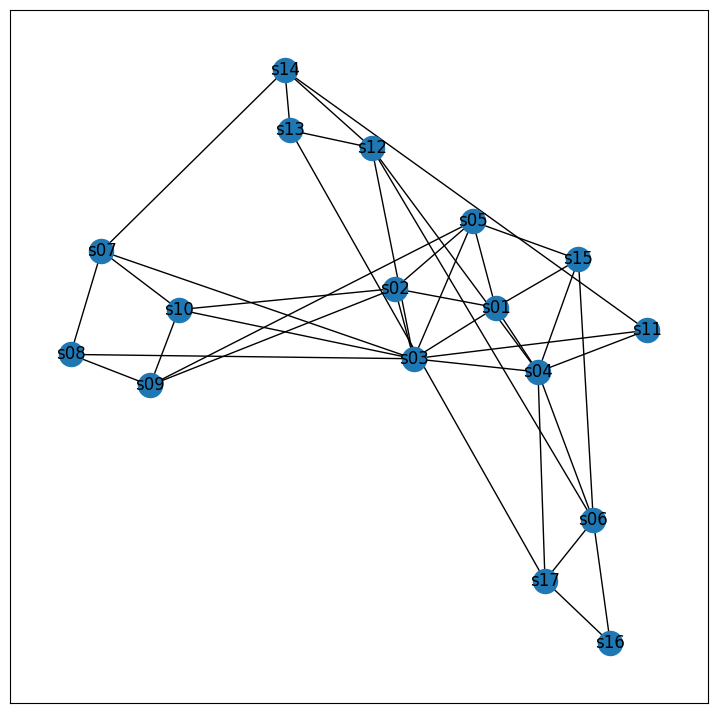

In [335]:
plt.figure(figsize=(9,9))
nx.draw_networkx(G)
plt.show()

## 1. Network Centrality Measures

(array([ 1.,  0.,  1., 10.,  1.,  0.,  0.,  3.,  0.,  1.]),
 array([24. , 30.4, 36.8, 43.2, 49.6, 56. , 62.4, 68.8, 75.2, 81.6, 88. ]),
 <BarContainer object of 10 artists>)

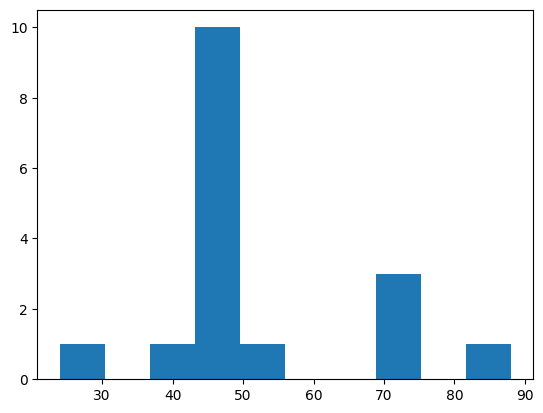

In [336]:
#Degree plot for undirected and weighted graph
degrees = [G.degree(n, weight='weight') for n in G.nodes()]
plt.hist(degrees)

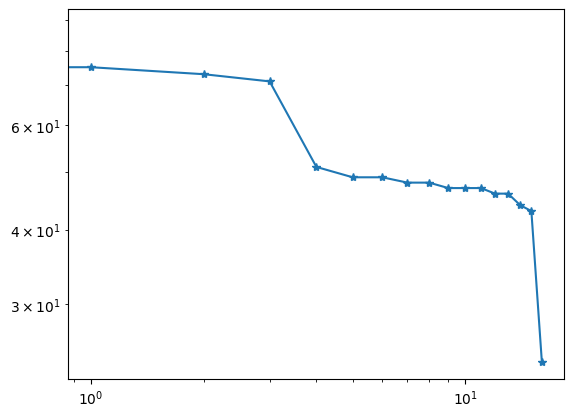

In [337]:
degree_sequence = sorted([d for n, d in G.degree(weight='weight')], reverse=True)
plt.loglog(degree_sequence,marker='*')
plt.show()

In [338]:
#Degree centrality for weighted graph
degree = G.degree(weight='weight')
max_degree = max(dict(degree).values())

degree_centrality_weighted = [deg/max_degree for deg in dict(degree).values()]

degree_centrality_weighted

[1.0,
 0.8068181818181818,
 0.8295454545454546,
 0.8522727272727273,
 0.5454545454545454,
 0.5340909090909091,
 0.5568181818181818,
 0.5227272727272727,
 0.5227272727272727,
 0.2727272727272727,
 0.5568181818181818,
 0.5795454545454546,
 0.5340909090909091,
 0.5,
 0.5340909090909091,
 0.5454545454545454,
 0.48863636363636365]

In [339]:
nx.degree_centrality(G)

{'s01': 0.3125,
 's02': 0.3125,
 's03': 0.5625,
 's04': 0.4375,
 's15': 0.25,
 's09': 0.25,
 's10': 0.25,
 's05': 0.3125,
 's08': 0.1875,
 's11': 0.1875,
 's12': 0.3125,
 's06': 0.3125,
 's17': 0.25,
 's16': 0.125,
 's07': 0.25,
 's14': 0.25,
 's13': 0.1875}

# Test1

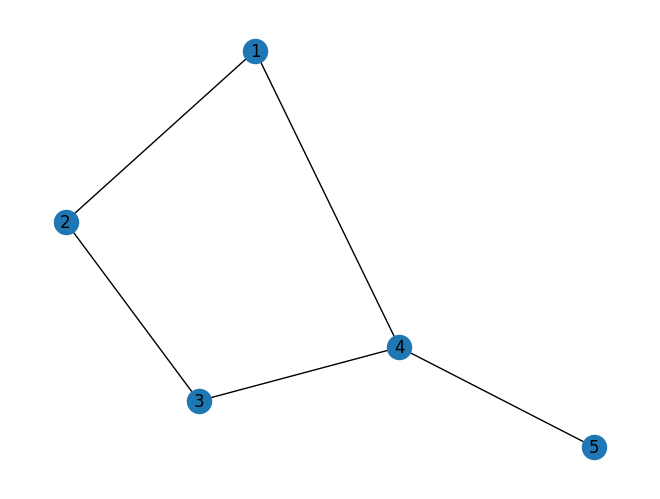

In [340]:
import networkx as nx
G_test = nx.Graph()
edges = [(1, 2, 1),(1, 4, 1), (2, 3, 2),(4, 3, 2),(4, 5, 2)]
G_test.add_weighted_edges_from(edges)
nx.draw(G_test, with_labels=True)
#nx.out_degree_centrality(G)

(array([2., 0., 0., 1., 0., 0., 1., 0., 0., 1.]),
 array([2. , 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5. ]),
 <BarContainer object of 10 artists>)

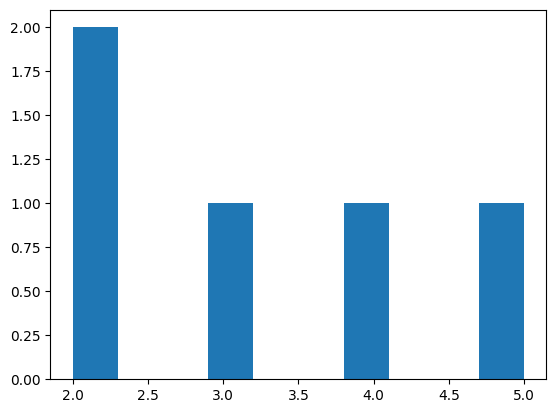

In [341]:
degrees = [G_test.degree(n, weight='weight') for n in G_test.nodes()]
plt.hist(degrees)

# Test2

{1: 0.3333333333333333,
 2: 0.6666666666666666,
 3: 0.3333333333333333,
 4: 0.6666666666666666}

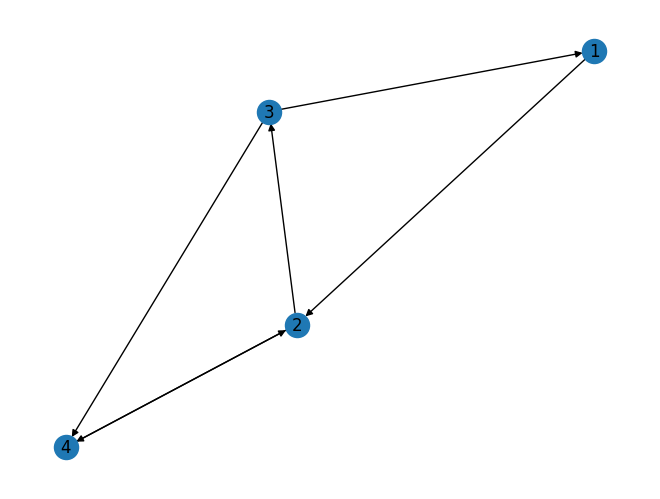

In [342]:
import networkx as nx
G_test2 = nx.DiGraph()
edges = [(1, 2, 2), 
         (2, 3, 1), (2, 4, 2),
         (3, 4, 1), (3, 1, 2), 
         (4, 2, 2)]
G_test2.add_weighted_edges_from(edges)
nx.draw(G_test2, with_labels=True)

nx.in_degree_centrality(G_test2)

## 2. Closeness centrality

In [356]:
nx.closeness_centrality(G)

{'s01': 0.5333333333333333,
 's02': 0.48484848484848486,
 's03': 0.6666666666666666,
 's04': 0.6153846153846154,
 's15': 0.48484848484848486,
 's09': 0.41025641025641024,
 's10': 0.47058823529411764,
 's05': 0.5161290322580645,
 's08': 0.45714285714285713,
 's11': 0.5161290322580645,
 's12': 0.5714285714285714,
 's06': 0.5,
 's17': 0.45714285714285713,
 's16': 0.35555555555555557,
 's07': 0.48484848484848486,
 's14': 0.47058823529411764,
 's13': 0.43243243243243246}

In [357]:
nx.closeness_centrality(G, distance='weight')

{'s01': 0.16326530612244897,
 's02': 0.13008130081300814,
 's03': 0.21621621621621623,
 's04': 0.16666666666666666,
 's15': 0.14414414414414414,
 's09': 0.14678899082568808,
 's10': 0.1553398058252427,
 's05': 0.1927710843373494,
 's08': 0.15384615384615385,
 's11': 0.1839080459770115,
 's12': 0.2077922077922078,
 's06': 0.1839080459770115,
 's17': 0.11347517730496454,
 's16': 0.03827751196172249,
 's07': 0.1797752808988764,
 's14': 0.1568627450980392,
 's13': 0.10256410256410256}

## 3. Betweenness centrality

In [355]:
nx.betweenness_centrality(G, weight='weight')

{'s01': 0.0,
 's02': 0.0,
 's03': 0.7583333333333333,
 's04': 0.325,
 's15': 0.0,
 's09': 0.11666666666666667,
 's10': 0.0,
 's05': 0.3333333333333333,
 's08': 0.0,
 's11': 0.125,
 's12': 0.5,
 's06': 0.2916666666666667,
 's17': 0.125,
 's16': 0.0,
 's07': 0.0,
 's14': 0.0,
 's13': 0.0}

In [349]:
#Sort for identifying most inflential nodes using betweenness centrality
betweenness_centrality_weighted = nx.betweenness_centrality(G, weight='weight')

for node in sorted(betweenness_centrality_weighted, key=betweenness_centrality_weighted.get, reverse=True):
  print(node, betweenness_centrality_weighted[node])

s03 0.7583333333333333
s12 0.5
s05 0.3333333333333333
s04 0.325
s06 0.2916666666666667
s11 0.125
s17 0.125
s09 0.11666666666666667
s01 0.0
s02 0.0
s15 0.0
s10 0.0
s08 0.0
s16 0.0
s07 0.0
s14 0.0
s13 0.0


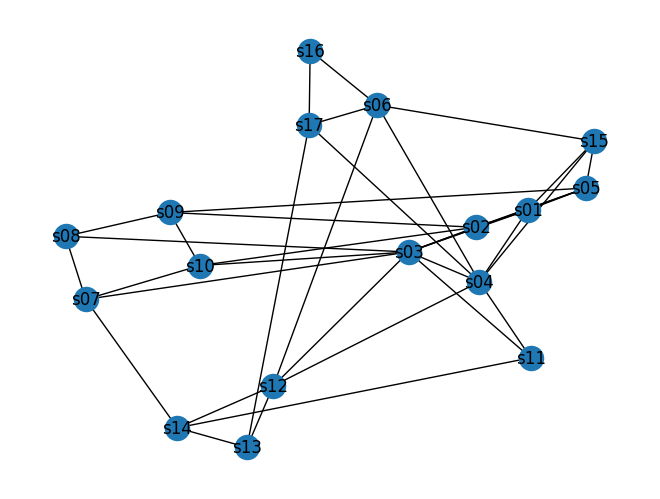

In [350]:
nx.draw(G, with_labels=True)

## 4. Eigenvector Centrality

In [351]:
nx.eigenvector_centrality(G, weight='weight',max_iter = 600)

{'s01': 0.5243879751840347,
 's02': 0.4234266643002834,
 's03': 0.4609728287014518,
 's04': 0.39415737973056825,
 's15': 0.267266335747827,
 's09': 0.06061597013618107,
 's10': 0.0843957773249976,
 's05': 0.24206579035422507,
 's08': 0.05344744462526895,
 's11': 0.142060019159748,
 's12': 0.04535228494306332,
 's06': 0.055568140658198546,
 's17': 0.055243182694160516,
 's16': 0.0378071954872536,
 's07': 0.053844817974830816,
 's14': 0.02919874249016756,
 's13': 0.025133401245443672}

## 5. PageRank Centrality

In [353]:
nx.pagerank(G, weight='weight')

{'s01': 0.08510275171090052,
 's02': 0.07036723548249191,
 's03': 0.07210878220106506,
 's04': 0.07793068159840727,
 's15': 0.05086993441701706,
 's09': 0.055565198429846537,
 's10': 0.05703894111148803,
 's05': 0.04910224124242256,
 's08': 0.05483671362647849,
 's11': 0.030132480983098633,
 's12': 0.05929092165421931,
 's06': 0.06038211879945627,
 's17': 0.05616702153345073,
 's16': 0.05330205121583224,
 's07': 0.0558770073826599,
 's14': 0.05866910324143484,
 's13': 0.05325681536973059}